In [2]:
print("This is my Final Project for Data Science Course")

This is my Final Project for Data Science Course


In [3]:
# Import necessary libraries
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

# Define the stock ticker and date range
ticker = 'AAPL'
start_date = '2015-01-01'
end_date = '2023-12-31'

# Fetch historical stock data from Yahoo Finance
data = yf.download(ticker, start=start_date, end=end_date)

data = pd.DataFrame(data)

# Display the first few rows of the data
data.head()



[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2015-01-02 00:00:00+00:00,24.347176,27.332500,27.860001,26.837500,27.847500,212818400
2015-01-05 00:00:00+00:00,23.661278,26.562500,27.162500,26.352501,27.072500,257142000
2015-01-06 00:00:00+00:00,23.663498,26.565001,26.857500,26.157499,26.635000,263188400
2015-01-07 00:00:00+00:00,23.995317,26.937500,27.049999,26.674999,26.799999,160423600
2015-01-08 00:00:00+00:00,24.917267,27.972500,28.037500,27.174999,27.307501,237458000


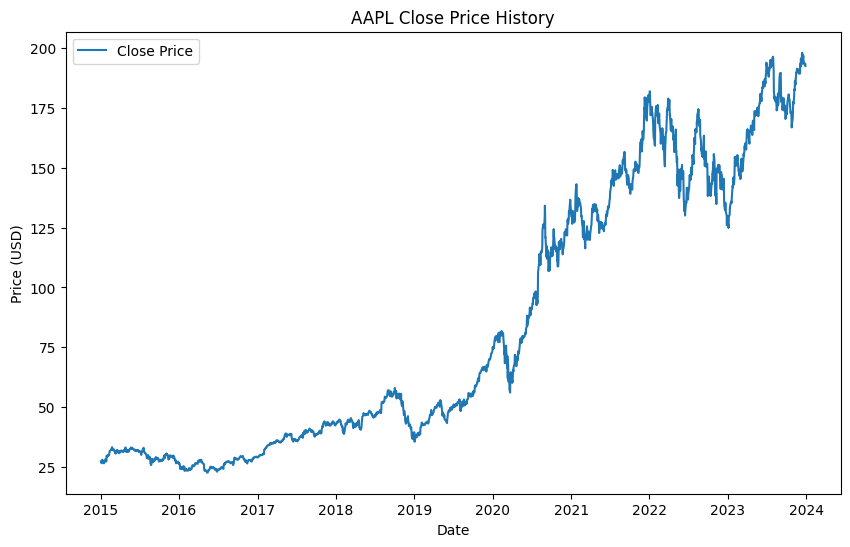

In [4]:
# Plot the closing price
plt.figure(figsize=(10,6))
plt.plot(data['Close'], label='Close Price')
plt.title(f'{ticker} Close Price History')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

Price                          Close     SMA_50    SMA_200        RSI
Ticker                          AAPL                                 
Date                                                                 
2015-01-02 00:00:00+00:00  27.332500  83.449325  81.814168  55.778343
2015-01-05 00:00:00+00:00  26.562500  83.449325  81.814168  55.778343
2015-01-06 00:00:00+00:00  26.565001  83.449325  81.814168  55.778343
2015-01-07 00:00:00+00:00  26.937500  83.449325  81.814168  55.778343
2015-01-08 00:00:00+00:00  27.972500  83.449325  81.814168  55.778343


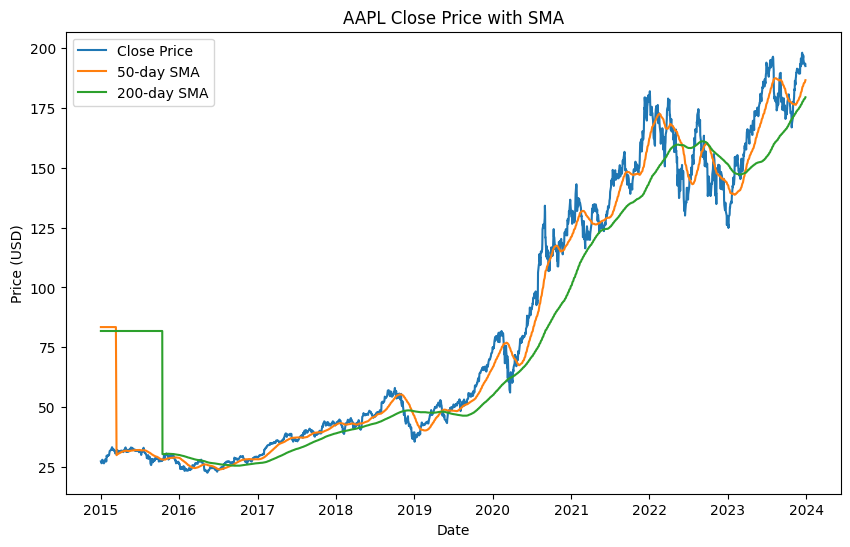

In [5]:
# Calculate Simple Moving Average (SMA)
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Calculate Relative Strength Index (RSI)
delta = data['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
average_gain = gain.rolling(window=14).mean()
average_loss = loss.rolling(window=14).mean()
rs = average_gain / average_loss
data['RSI'] = 100 - (100 / (1 + rs))

# Fill NaN values with mean of the column
data.fillna(data.mean(), inplace=True)


# Display the first few rows with indicators
print(data[['Close', 'SMA_50', 'SMA_200', 'RSI']].head())



# Plot Close Price with SMA
plt.figure(figsize=(10,6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['SMA_50'], label='50-day SMA')
plt.plot(data['SMA_200'], label='200-day SMA')
plt.title(f'{ticker} Close Price with SMA')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()



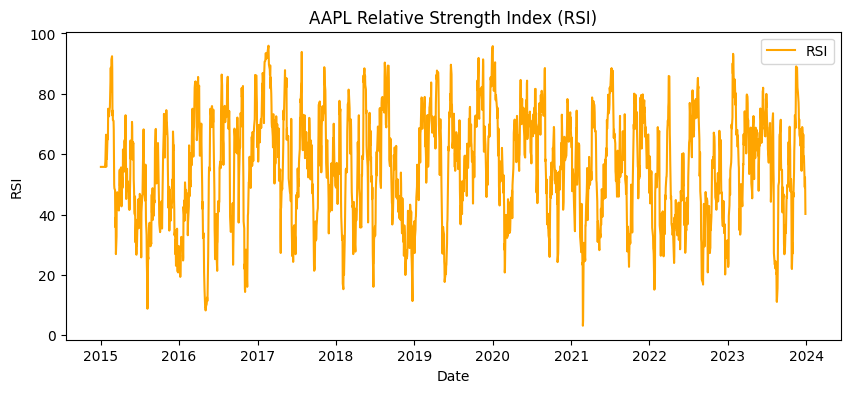

In [6]:
# Plot RSI
plt.figure(figsize=(10,4))
plt.plot(data['RSI'], label='RSI', color='orange')
plt.title(f'{ticker} Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()

In [7]:
data.isnull().sum()

Price      Ticker
Adj Close  AAPL      0
Close      AAPL      0
High       AAPL      0
Low        AAPL      0
Open       AAPL      0
Volume     AAPL      0
SMA_50               0
SMA_200              0
RSI                  0
dtype: int64

[*********************100%***********************]  1 of 1 completed


X_train shape: (1604, 60, 4)
X_test shape: (401, 60, 4)
y_train shape: (1604,)
y_test shape: (401,)


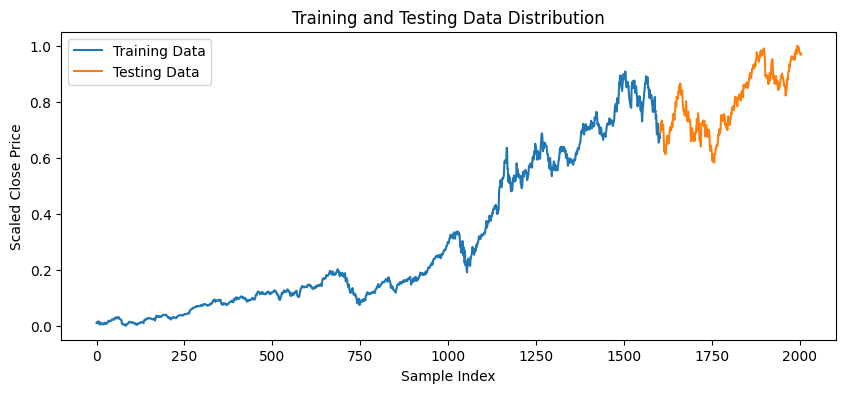

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Define the stock ticker and date range
ticker = 'AAPL'
start_date = '2015-01-01'
end_date = '2023-12-31'

# Fetch historical stock data from Yahoo Finance
data = yf.download(ticker, start=start_date, end=end_date)

# Calculate Simple Moving Average (SMA)
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Calculate Relative Strength Index (RSI)
delta = data['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
average_gain = gain.rolling(window=14).mean()
average_loss = loss.rolling(window=14).mean()
rs = average_gain / average_loss
data['RSI'] = 100 - (100 / (1 + rs))

# Drop rows with NaN values
data.dropna(inplace=True)

# Check if data is not empty after dropping NaNs
if data.empty:
    raise ValueError("No data available after applying technical indicators. "
                     "Consider adjusting the window sizes or date range.")

# Select relevant features
features = ['Close', 'SMA_50', 'SMA_200', 'RSI']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the features
scaled_data = scaler.fit_transform(data[features])

# Define time steps
time_steps = 60

# Create empty lists for features and labels
X, y = [], []

# Create time-series dataset
for i in range(time_steps, len(scaled_data)):
    X.append(scaled_data[i-time_steps:i])
    y.append(scaled_data[i][0])

# Convert to numpy arrays
X, y = np.array(X), np.array(y)

# Check if there is enough data after creating time-series dataset
if len(X) == 0:
    raise ValueError("Time-series dataset is empty. "
                     "Consider reducing the number of time steps or checking the data.")

# Split into training and testing sets using train_test_split with shuffle=False
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# Display the shapes of the datasets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

# Plot the distribution of training and testing data
plt.figure(figsize=(10,4))
plt.plot(y_train, label='Training Data')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Testing Data')
plt.title('Training and Testing Data Distribution')
plt.xlabel('Sample Index')
plt.ylabel('Scaled Close Price')
plt.legend()
plt.show()


2025-01-09 10:21:43.705969: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-09 10:21:43.826119: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-09 10:21:43.973790: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736400104.118028   44916 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736400104.153334   44916 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-09 10:21:44.454743: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

Epoch 1/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0376 - val_loss: 0.0042
Epoch 2/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 9.3162e-04 - val_loss: 0.0039
Epoch 3/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 6.3691e-04 - val_loss: 0.0018
Epoch 4/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 4.5090e-04 - val_loss: 0.0011
Epoch 5/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 3.9666e-04 - val_loss: 0.0013
Epoch 6/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 8.7491e-04 - val_loss: 0.0012
Epoch 7/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 4.1946e-04 - val_loss: 8.9993e-04
Epoch 8/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 4.5351e-04 - val_loss: 0.0021
Epoch 9/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 4.0710e-04 - val_loss: 8.0170e-04
Epoch 10/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 3.4363e-04 - val_loss: 0.0013
Epoch 11/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 4.1036e-04 - val_loss: 0.0011
Epoch 12/20
51/

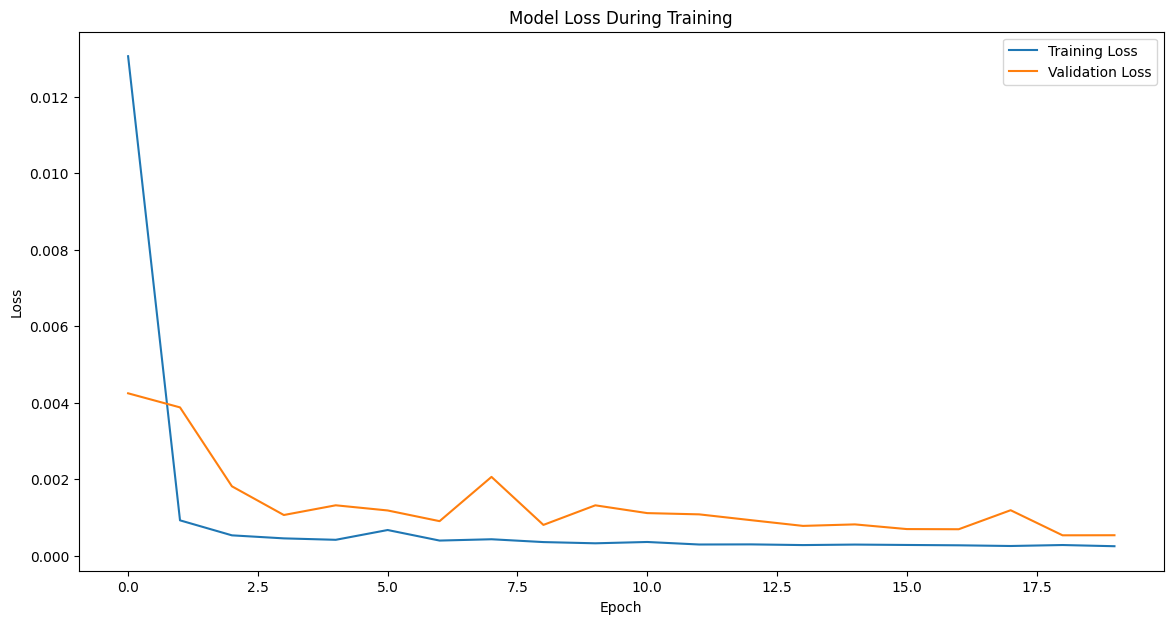

In [9]:
# Import necessary libraries
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import LSTM, Dense # type: ignore
import matplotlib.pyplot as plt

# Define the stock ticker and date range
ticker = 'AAPL'
start_date = '2015-01-01'
end_date = '2023-12-31'

# Fetch historical stock data from Yahoo Finance
data = yf.download(ticker, start=start_date, end=end_date)

# Calculate Simple Moving Average (SMA)
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Calculate Relative Strength Index (RSI)
delta = data['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
average_gain = gain.rolling(window=14).mean()
average_loss = loss.rolling(window=14).mean()
rs = average_gain / average_loss
data['RSI'] = 100 - (100 / (1 + rs))

# Drop rows with NaN values
data.dropna(inplace=True)

# Select relevant features
features = ['Close', 'SMA_50', 'SMA_200', 'RSI']
scaled_data = MinMaxScaler().fit_transform(data[features])

# Define time steps
time_steps = 60

# Create empty lists for features and labels
X, y = [], []

# Create time-series dataset
for i in range(time_steps, len(scaled_data)):
    X.append(scaled_data[i-time_steps:i])
    y.append(scaled_data[i][0])

# Convert to numpy arrays
X, y = np.array(X), np.array(y)

# Split into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Plot training and validation loss
plt.figure(figsize=(14,7))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Save the trained model
model.save('lstm_stock_model.h5')


[*********************100%***********************]  1 of 1 completed


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


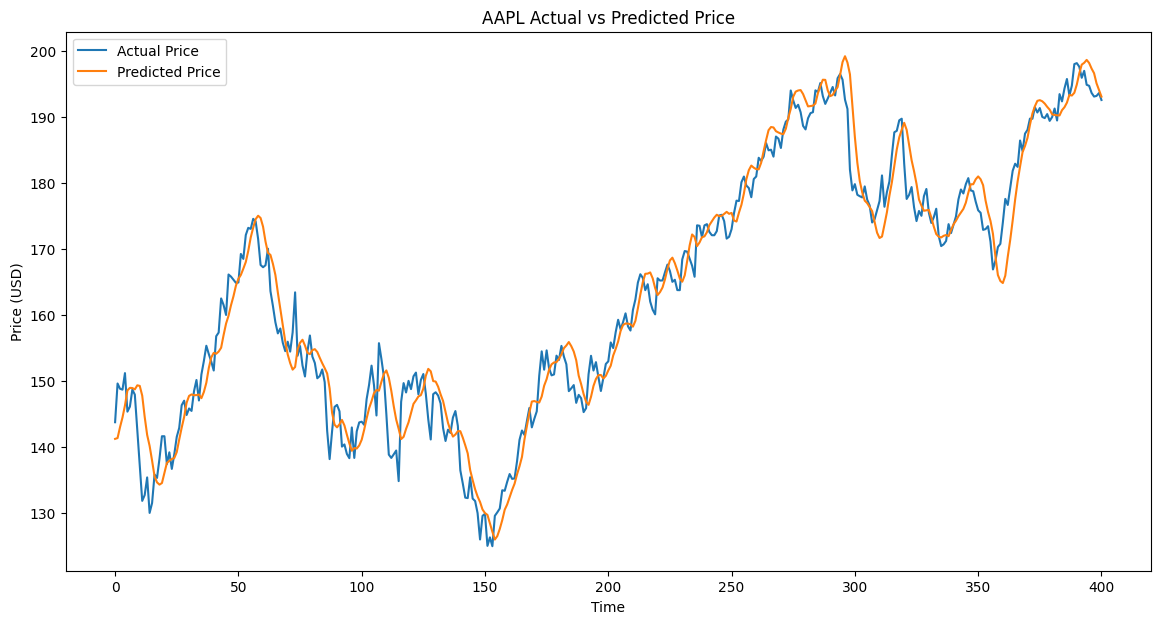

In [10]:
# Import necessary libraries
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Define the stock ticker and date range
ticker = 'AAPL'
start_date = '2015-01-01'
end_date = '2023-12-31'

# Fetch historical stock data from Yahoo Finance
data = yf.download(ticker, start=start_date, end=end_date)

# Calculate Simple Moving Average (SMA)
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Calculate Relative Strength Index (RSI)
delta = data['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
average_gain = gain.rolling(window=14).mean()
average_loss = loss.rolling(window=14).mean()
rs = average_gain / average_loss
data['RSI'] = 100 - (100 / (1 + rs))

# Drop rows with NaN values
data.dropna(inplace=True)

# Select relevant features
features = ['Close', 'SMA_50', 'SMA_200', 'RSI']
scaled_data = MinMaxScaler().fit_transform(data[features])

# Define time steps
time_steps = 60

# Create empty lists for features and labels
X, y = [], []

# Create time-series dataset
for i in range(time_steps, len(scaled_data)):
    X.append(scaled_data[i-time_steps:i])
    y.append(scaled_data[i][0])

# Convert to numpy arrays
X, y = np.array(X), np.array(y)

# Split into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Load the trained model
model = load_model('lstm_stock_model.h5')

# Make predictions
predictions = model.predict(X_test)
predictions = predictions.flatten()

# Inverse transform the predictions and actual values
scaler = MinMaxScaler()
scaler.fit(data[features])
predictions = scaler.inverse_transform(np.concatenate((predictions.reshape(-1,1), np.zeros((predictions.shape[0],3))), axis=1))[:,0]
actual = scaler.inverse_transform(np.concatenate((y_test.reshape(-1,1), np.zeros((y_test.shape[0],3))), axis=1))[:,0]

# Plot actual vs predicted prices
plt.figure(figsize=(14,7))
plt.plot(actual, label='Actual Price')
plt.plot(predictions, label='Predicted Price')
plt.title(f'{ticker} Actual vs Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


Shape of last_time_steps before reshaping: (60, 4)
Shape of last_time_steps after reshaping: (1, 60, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━

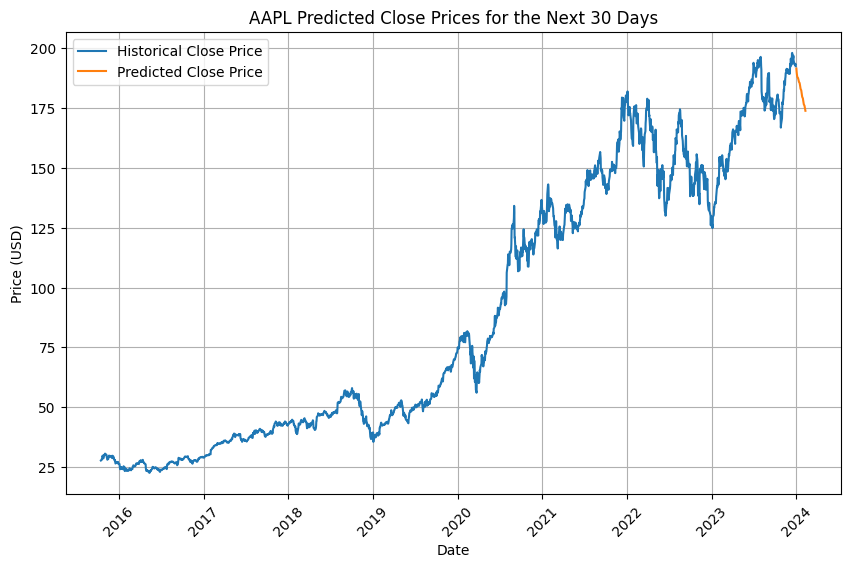

In [11]:
# Import necessary libraries
import numpy as np
import pandas as pd
import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load the trained multi-step LSTM model
model = load_model('lstm_stock_model.h5')  # Ensure the model file is in the working directory

# Define forecast steps (e.g., next 30 days)
forecast_steps = 30

# Function to perform recursive forecasting
def recursive_forecast(model, last_time_steps, scaler, forecast_steps, feature_count):
    predictions_inv = []
    current_input = last_time_steps.copy()
    
    for _ in range(forecast_steps):
        # Make prediction
        pred = model.predict(current_input)
        pred_value = pred[0, 0]  # Assuming single-step prediction
        
        # Inverse transform the predicted 'Close' price
        pred_scaled = pred_value
        # Create a full feature array with 'Close' as predicted and others as last known
        last_known = current_input[0, -1, 1:]  # Get the last known values of other features
        pred_full = np.concatenate(([pred_scaled], last_known))
        pred_inv = scaler.inverse_transform(pred_full.reshape(1, -1))[:, 0]
        predicted_close = pred_inv[0]
        predictions_inv.append(predicted_close)
        
        # Update the input for the next prediction
        # Replace 'Close' with the predicted value and keep other features unchanged
        new_step = np.concatenate(([pred_scaled], last_known)).reshape(1, 1, feature_count)
        current_input = np.concatenate((current_input[:, 1:, :], new_step), axis=1)
    
    return predictions_inv

# Prepare the latest data for prediction
last_time_steps = scaled_data[-time_steps:]  # Get the last 'time_steps' data points
print(f"Shape of last_time_steps before reshaping: {last_time_steps.shape}")  # Debugging
last_time_steps = np.expand_dims(last_time_steps, axis=0)  # Reshape to (1, time_steps, features)
print(f"Shape of last_time_steps after reshaping: {last_time_steps.shape}")  # Debugging

# Perform recursive forecasting
forecasted_prices = recursive_forecast(model, last_time_steps, scaler, forecast_steps, scaled_data.shape[1])
forecasted_prices = np.array(forecasted_prices)
print(f"Forecasted Prices: {forecasted_prices.shape}")  # Should be (30,)

# Inverse transform the predictions to original scale (already done in the function)
future_predictions_inv = forecasted_prices  # Shape: (30,)

# Generate future dates (only business days)
last_date = data.index[-1]
future_dates = pd.bdate_range(last_date + pd.Timedelta(days=1), periods=forecast_steps)

# Create a DataFrame for future predictions
future_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted Close': future_predictions_inv
})
future_df.set_index('Date', inplace=True)

# Display the future predictions
print(future_df.head())

# Plot the future predictions
plt.figure(figsize=(10,6))
plt.plot(data['Close'], label='Historical Close Price')  # Plot historical prices
plt.plot(future_df.index, future_df['Predicted Close'], label='Predicted Close Price')  # Plot predicted prices
plt.title(f'{ticker} Predicted Close Prices for the Next {forecast_steps} Days')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


[*********************100%***********************]  1 of 1 completed


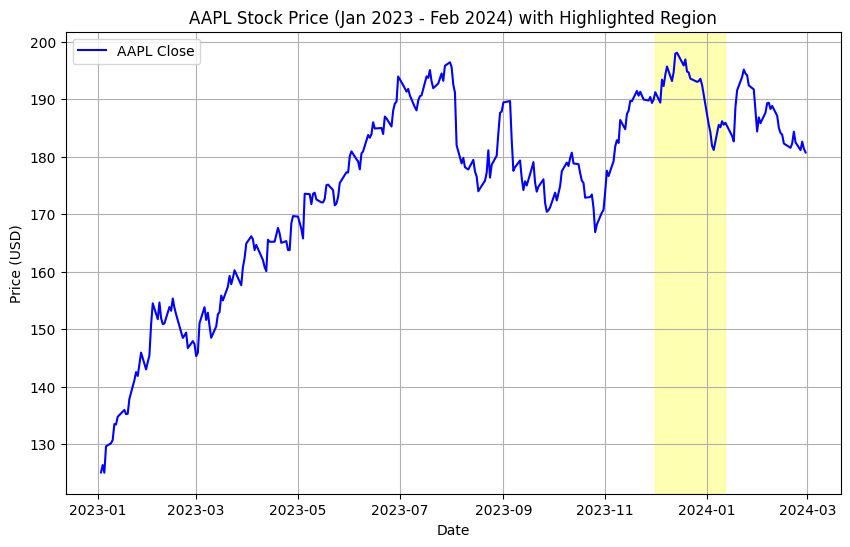

In [12]:
# If you haven't installed yfinance yet, uncomment and run the following line:
# !pip install yfinance

import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Define the full download period (e.g., Jan 2023 to Mar 2024)
start_date = '2023-01-01'
end_date   = '2024-03-01'

# Download AAPL stock data
data = yf.download("AAPL", start=start_date, end=end_date)

if data.empty:
    print("No data found for the specified date range.")
else:
    # Plot the closing price for the entire date range
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['Close'], label='AAPL Close', color='blue')
    
    # Define highlight region: November 2023 to February 2024
    highlight_start = pd.to_datetime('2023-12-01')
    highlight_end   = pd.to_datetime('2024-01-12')  # or '2024-02-28'

    # Shade the region between highlight_start and highlight_end
    # alpha controls the transparency of the hading
    plt.axvspan(highlight_start, highlight_end, color='yellow', alpha=0.3)
    
    plt.title('AAPL Stock Price (Jan 2023 - Feb 2024) with Highlighted Region')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.grid(True)
    plt.legend()
    plt.show()


In [13]:
future_df.tail()

,Predicted Close
Date,
2024-02-05 00:00:00+00:00,176.036329
2024-02-06 00:00:00+00:00,175.477171
2024-02-07 00:00:00+00:00,174.937180
2024-02-08 00:00:00+00:00,174.416021
2024-02-09 00:00:00+00:00,173.913463


[*********************100%***********************]  1 of 1 completed

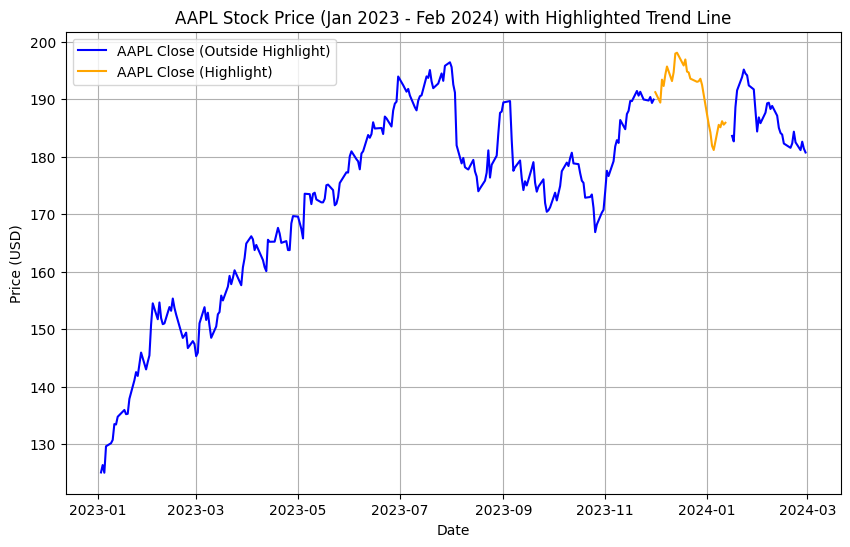

In [20]:
# If you haven't installed yfinance yet, uncomment and run the following line:
# !pip install yfinance

import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Define the full download period (e.g., Jan 2023 to Mar 2024)
start_date = '2023-01-01'
end_date = '2024-03-01'

# Download AAPL stock data
data = yf.download("AAPL", start=start_date, end=end_date)

if data.empty:
    print("No data found for the specified date range.")
else:
    # Define highlight region: December 2023 to January 2024
    highlight_start = pd.Timestamp('2023-12-01', tz=data.index.tz)
    highlight_end = pd.Timestamp('2024-01-12', tz=data.index.tz)

    # Split the data into two parts: inside and outside the highlight range
    within_highlight = data[(data.index >= highlight_start) & (data.index <= highlight_end)]
    outside_highlight_before = data[data.index < highlight_start]
    outside_highlight_after = data[data.index > highlight_end]

    # Plot the data
    plt.figure(figsize=(10, 6))
    
    # Plot the data outside the highlighted region in blue
    plt.plot(outside_highlight_before.index, outside_highlight_before['Close'], label='AAPL Close (Outside Highlight)', color='blue')
    plt.plot(outside_highlight_after.index, outside_highlight_after['Close'], color='blue')
    
    # Plot the data inside the highlighted region in orange
    plt.plot(within_highlight.index, within_highlight['Close'], label='AAPL Close (Highlight)', color='orange')

    # Add labels, title, and legend
    plt.title('AAPL Stock Price (Jan 2023 - Feb 2024) with Highlighted Trend Line')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.grid(True)
    plt.legend()
    plt.show()
